# Метод аддитивной свертки критериев

Исходная задача с несколькими критериями преобразуется в однокритериальную задачу с помощью аддитивной свертки и нормироваными весами. Решается задача минимизации F. В результате находится точка которая является оптимальной по Парето

Точка 1:
  Веса: w1=0.714, w2=0.234, w3=0.052
  Координаты: x1=0.72082, x2=0.36520
  Взвешенная сумма: 10.00409
  Значения критериев: f1=4.30887, f2=18.53329, f3=49.55757
-------------------------------------------------------------------------------------
Точка 2:
  Веса: w1=0.659, w2=0.246, w3=0.095
  Координаты: x1=0.82650, x2=-0.01738
  Взвешенная сумма: 11.86387
  Значения критериев: f1=5.44690, f2=17.90935, f3=40.86038
-------------------------------------------------------------------------------------
Точка 3:
  Веса: w1=0.255, w2=0.350, w3=0.395
  Координаты: x1=1.24503, x2=-1.74951
  Взвешенная сумма: 16.99754
  Значения критериев: f1=14.62877, f2=22.18399, f3=13.93094
-------------------------------------------------------------------------------------
Точка 4:
  Веса: w1=0.554, w2=0.259, w3=0.187
  Координаты: x1=1.07629, x2=-0.67169
  Взвешенная сумма: 14.50981
  Значения критериев: f1=7.99118, f2=19.14268, f3=27.36505
------------------------------------------------------

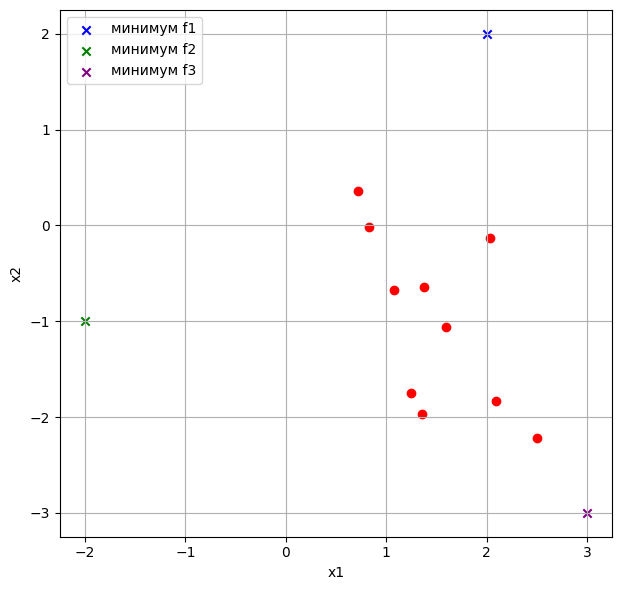

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x, a1=1, b1=2, c1=1, d1=2):
    return a1 * (x[0] - b1)**2 + c1 * (x[1] - d1)**2

def f2(x, a2=2, b2=-2, c2=2, d2=-1):
    return a2 * (x[0] - b2)**2 + c2 * (x[1] - d2)**2

def f3(x, a3=3, b3=3, c3=3, d3=-3):
    return a3 * (x[0] - b3)**2 + c3 * (x[1] - d3)**2

# функция генерации весов
def generate_weights(n_points=10):
    weights = []
    for _ in range(n_points):
        while True:
            w = np.random.dirichlet(np.ones(3))
            if (w > 0.05).all():
                weights.append(w)
                break
    return weights

# Градиентный спуск
def gradient_descent(f, initial_point, learning_rate=0.01, max_iter=1000, tol=1e-6):
    x = np.array(initial_point, dtype=float)
    for _ in range(max_iter):
        h = 1e-5
        grad = np.zeros_like(x)
        for j in range(len(x)):
            x_plus = x.copy(); x_plus[j] += h
            x_minus = x.copy(); x_minus[j] -= h
            grad[j] = (f(x_plus) - f(x_minus)) / (2*h)
        x_new = x - learning_rate * grad
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x

# Поиск Парето точек
def find_pareto_points(n_points=10):
    weights = generate_weights(n_points)
    results = []
    for w in weights:
        x0 = np.array([0, 0])
        def objective(x):
            return w[0]*f1(x) + w[1]*f2(x) + w[2]*f3(x)
        x_opt = gradient_descent(objective, x0)
        
        results.append({
            'weights': w,
            'point': x_opt,
            'weighted_sum': objective(x_opt),
            'f_values': [f1(x_opt), f2(x_opt), f3(x_opt)]
        })
    return results

# Визуализация
def plot_results(results):
    points = np.array([res['point'] for res in results])
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='red')
    plt.scatter(2, 2, c='blue', marker='x', label='минимум f1')
    plt.scatter(-2, -1, c='green', marker='x', label='минимум f2')
    plt.scatter(3, -3, c='purple', marker='x', label='минимум f3')
    plt.grid()
    plt.xlabel('x1');
    plt.ylabel('x2')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


results = find_pareto_points(10)

for i, res in enumerate(results, 1):
    print(f"Точка {i}:")
    print(f"  Веса: w1={res['weights'][0]:.3f}, w2={res['weights'][1]:.3f}, w3={res['weights'][2]:.3f}")
    print(f"  Координаты: x1={res['point'][0]:.5f}, x2={res['point'][1]:.5f}")
    print(f"  Взвешенная сумма: {res['weighted_sum']:.5f}")
    print(f"  Значения критериев: f1={res['f_values'][0]:.5f}, f2={res['f_values'][1]:.5f}, f3={res['f_values'][2]:.5f}")
    print("-"*85)

plot_results(results)

# Дискриминационный метод

Лицо, принимающее решение (ЛПР), задает допустимые уровни для части критериев превращая их в ограничения, а оставшиеся критерии оптимизируются через аддитивную свертку

Точка 1:
  Веса: w1=0.492, w2=0.298, w3=0.210
  Координаты: x1=0.73619, x2=-0.88495
  Взвешенная сумма: 15.39903
  Значения критериев: f1=9.92012, f2=15.00000, f3=28.79479
-------------------------------------------------------------------------------------
Точка 2:
  Веса: w1=0.077, w2=0.227, w3=0.696
  Координаты: x1=0.73675, x2=-0.89900
  Взвешенная сумма: 24.08654
  Значения критериев: f1=10.00000, f2=15.00000, f3=28.60951
-------------------------------------------------------------------------------------
Точка 3:
  Веса: w1=0.151, w2=0.739, w3=0.110
  Координаты: x1=-0.13794, x2=-0.33007
  Взвешенная сумма: 12.89836
  Значения критериев: f1=10.00000, f2=7.83218, f3=50.92546
-------------------------------------------------------------------------------------
Точка 4:
  Веса: w1=0.261, w2=0.433, w3=0.307
  Координаты: x1=0.73675, x2=-0.89900
  Взвешенная сумма: 17.86810
  Значения критериев: f1=10.00000, f2=15.00000, f3=28.60951
---------------------------------------------------

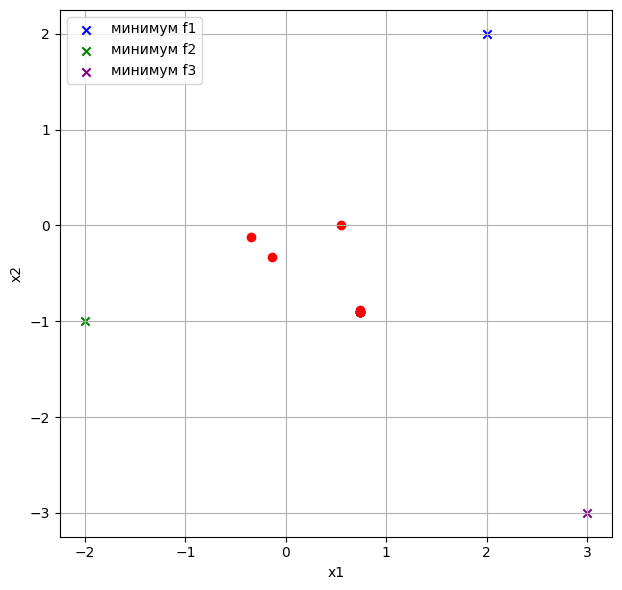

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def f1(x, a1=1, b1=2, c1=1, d1=2):
    return a1 * (x[0] - b1)**2 + c1 * (x[1] - d1)**2

def f2(x, a2=2, b2=-2, c2=2, d2=-1):
    return a2 * (x[0] - b2)**2 + c2 * (x[1] - d2)**2

def f3(x, a3=3, b3=3, c3=3, d3=-3):
    return a3 * (x[0] - b3)**2 + c3 * (x[1] - d3)**2

def generate_weights(n_points=10):
    weights = []
    for _ in range(n_points):
        while True:
            w = np.random.dirichlet(np.ones(3))
            if (w > 0.05).all():
                weights.append(w)
                break
    return weights

def constrained_optimization(w, a1_max=None, a2_max=None, a3_max=None):
    x0 = np.array([-5.0, -5.0])
    bounds = [(-5, 5), (-5, 5)]
    
    constraints = []
    if a1_max is not None:
        constraints.append({'type': 'ineq', 'fun': lambda x: a1_max - f1(x)})
    if a2_max is not None:
        constraints.append({'type': 'ineq', 'fun': lambda x: a2_max - f2(x)})
    if a3_max is not None:
        constraints.append({'type': 'ineq', 'fun': lambda x: a3_max - f3(x)})
    
    def objective(x):
        return w[0]*f1(x) + w[1]*f2(x) + w[2]*f3(x)
    
    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

def find_pareto_points_with_constraints(n_points=10, a1_max=None, a2_max=None, a3_max=None):
    weights = generate_weights(n_points)
    results = []
    for w in weights:
        x_opt = constrained_optimization(w, a1_max, a2_max, a3_max)
        results.append({
            'weights': w,
            'point': x_opt,
            'weighted_sum': w[0]*f1(x_opt) + w[1]*f2(x_opt) + w[2]*f3(x_opt),
            'f_values': [f1(x_opt), f2(x_opt), f3(x_opt)]
        })
    return results

def plot_results(results, a1_max=None, a2_max=None, a3_max=None):
    points = np.array([res['point'] for res in results])
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='red')
    plt.scatter(2, 2, c='blue', marker='x', label='минимум f1')
    plt.scatter(-2, -1, c='green', marker='x', label='минимум f2')
    plt.scatter(3, -3, c='purple', marker='x', label='минимум f3')
    
    if a1_max is not None:
        x1 = np.linspace(-5, 5, 100)
        x2 = np.linspace(-5, 5, 100)
        X1, X2 = np.meshgrid(x1, x2)
        F1 = f1([X1, X2])
    
    if a2_max is not None:
        F2 = f2([X1, X2])
    
    if a3_max is not None:
        F3 = f3([X1, X2])
    
    plt.grid()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

a1_max = 10.0  # Максимально допустимое значение для f1
a2_max = 15.0 # Максимально допустимое значение для f2
a3_max = None

results = find_pareto_points_with_constraints(10, a1_max, a2_max, a3_max)

for i, res in enumerate(results, 1):
    print(f"Точка {i}:")
    print(f"  Веса: w1={res['weights'][0]:.3f}, w2={res['weights'][1]:.3f}, w3={res['weights'][2]:.3f}")
    print(f"  Координаты: x1={res['point'][0]:.5f}, x2={res['point'][1]:.5f}")
    print(f"  Взвешенная сумма: {res['weighted_sum']:.5f}")
    print(f"  Значения критериев: f1={res['f_values'][0]:.5f}, f2={res['f_values'][1]:.5f}, f3={res['f_values'][2]:.5f}")
    print("-"*85)

plot_results(results, a1_max, a2_max, a3_max)

# Метод последовательных уступок

Критерии упорядовачиваются по важности и последовательно оптимизируя каждый из них с допустимыми уступками в остальных

Точка 1:
  Координаты: x1=1.43018, x2=0.52573
  Порядок критериев: ('f1', 'f2', 'f3')
  Уступки: f1=2.50, f2=4.80, f3=3.93
  Значения критериев: f1=2.49816, f2=28.18804, f3=44.68529
-------------------------------------------------------------------------------------
Точка 2:
  Координаты: x1=1.92038, x2=0.15927
  Порядок критериев: ('f1', 'f3', 'f2')
  Уступки: f1=3.39, f2=1.62, f3=1.62
  Значения критериев: f1=3.39463, f2=33.42658, f3=33.43965
-------------------------------------------------------------------------------------
Точка 3:
  Координаты: x1=-0.54679, x2=-0.65283
  Порядок критериев: ('f2', 'f1', 'f3')
  Уступки: f1=1.23, f2=4.46, f3=3.40
  Значения критериев: f1=13.52363, f2=4.46470, f3=54.26677
-------------------------------------------------------------------------------------
Точка 4:
  Координаты: x1=-1.29136, x2=-0.80253
  Порядок критериев: ('f2', 'f3', 'f1')
  Уступки: f1=3.83, f2=1.08, f3=4.88
  Значения критериев: f1=18.68721, f2=1.08234, f3=69.73383
----------

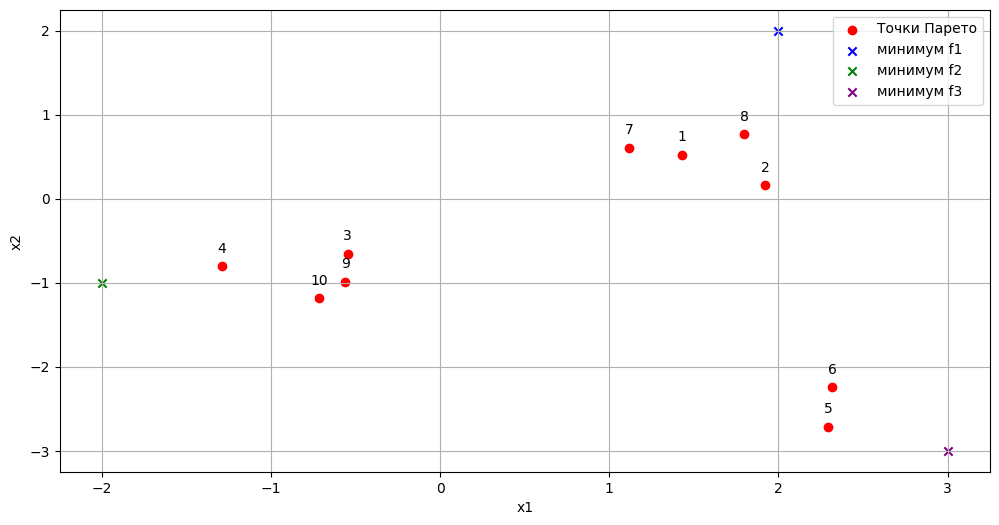

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from itertools import permutations

def f1(x, a1=1, b1=2, c1=1, d1=2):
    return a1 * (x[0] - b1)**2 + c1 * (x[1] - d1)**2

def f2(x, a2=2, b2=-2, c2=2, d2=-1):
    return a2 * (x[0] - b2)**2 + c2 * (x[1] - d2)**2

def f3(x, a3=3, b3=3, c3=3, d3=-3):
    return a3 * (x[0] - b3)**2 + c3 * (x[1] - d3)**2

def sequential_concessions_method(priority_order, concessions):
    x0 = np.array([0.0, 0.0])
    bounds = [(-5, 5), (-5, 5)]
    funcs = {'f1': f1, 'f2': f2, 'f3': f3}
    results = {}
    
    for i, criterion in enumerate(priority_order):
        def objective(x):
            return funcs[criterion](x)
        
        constraints = []
        for prev_criterion in priority_order[:i]:
            prev_opt = results[prev_criterion]['optimal_value']
            delta = concessions[prev_criterion]
            constraints.append({
                'type': 'ineq',
                'fun': lambda x, prev_opt=prev_opt, delta=delta, prev_criterion=prev_criterion: 
                    delta - (funcs[prev_criterion](x) - prev_opt)
            })
        
        result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)
        
        results[criterion] = {
            'optimal_point': result.x,
            'optimal_value': result.fun,
            'constraints': constraints.copy()
        }
    
    return results[priority_order[-1]]['optimal_point']

def generate_pareto_points(n_points=10):
    all_priority_orders = list(permutations(['f1', 'f2', 'f3']))
    
    np.random.seed(42)
    concessions_list = []
    for _ in range(n_points):
        concessions = {
            'f1': np.random.uniform(1, 5),
            'f2': np.random.uniform(1, 5),
            'f3': np.random.uniform(1, 5)
        }
        concessions_list.append(concessions)
    
    pareto_points = []
    for i in range(n_points):
        priority_order = all_priority_orders[i % len(all_priority_orders)]
        concessions = concessions_list[i]
        
        point = sequential_concessions_method(priority_order, concessions)
        pareto_points.append({
            'point': point,
            'priority_order': priority_order,
            'concessions': concessions,
            'f_values': [f1(point), f2(point), f3(point)]
        })
    
    return pareto_points

pareto_points = generate_pareto_points(10)

for i, pt in enumerate(pareto_points, 1):
    print(f"Точка {i}:")
    print(f"  Координаты: x1={pt['point'][0]:.5f}, x2={pt['point'][1]:.5f}")
    print(f"  Порядок критериев: {pt['priority_order']}")
    print(f"  Уступки: f1={pt['concessions']['f1']:.2f}, f2={pt['concessions']['f2']:.2f}, f3={pt['concessions']['f3']:.2f}")
    print(f"  Значения критериев: f1={pt['f_values'][0]:.5f}, f2={pt['f_values'][1]:.5f}, f3={pt['f_values'][2]:.5f}")
    print("-"*85)

def plot_pareto_points(pareto_points):
    points = np.array([pt['point'] for pt in pareto_points])
    plt.figure(figsize=(12, 6))
    
    plt.scatter(points[:, 0], points[:, 1], c='red', label='Точки Парето')
    plt.scatter(2, 2, c='blue', marker='x', label='минимум f1')
    plt.scatter(-2, -1, c='green', marker='x', label='минимум f2')
    plt.scatter(3, -3, c='purple', marker='x', label='минимум f3')
    
    for i, pt in enumerate(pareto_points):
        plt.annotate(
            f"{i+1}",
            (pt['point'][0], pt['point'][1]),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center'
        )
    
    plt.grid()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

plot_pareto_points(pareto_points)

1. В чем особенность многокритериальной оптимизации?

Особенность в том что задача имеет несколько критериев. Например, при проектировании самолёта нужно одновременно минимизировать стоимость максимизировать безопасность и снизить расход топлива

2. Какое решение называется оптимальным по Парето?

Решение называется оптимальным по Парето, если нельзя улучшить один критерий, не ухудшив хотя бы один другой

3. Дайте определение множества Парето.

Совокупность всех решений оптимальных по Парето

4. Почему точки множества Парето несравнимы по предпочтению?

Потому что одна точка множества не лучше другой по всем критериям одновременно

5. В чем заключается метод свертки критериев?

Это метод где все критерии объединяются в одно общее уравнение с помощью весовых коэффициентов которое минимизируют

6. В чем отличие дискриминационного метода от метода свертки критериев?

В дискриминационном методе один главный критерий оптимизируется, остальные превращаются в ограничения, а в методе свертки все критерии объединяются в один с весами

7. Какие основные преимущества имеет метод последовательных уступок?

Этот метод подходит для тех задач где одни еритерии имеют приоритет над остальными

